## Final Project Submission

Please fill out:
* Student name: 
* Student pace: Full time
* Scheduled project review date/time: 17/04/2023 - 21/04/2023
* Instructor name: Antonny Muiko
* Blog post URL: 


### TItle: Predicting Home Sale Prices in King County.

**Explanation**
> * This project aims to predict the sale price of homes in King County, based on various features such as the number of bedrooms, bathrooms, square footage, and location. The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Overview
This projects aims to analyze factors affecting house price in King County. Some of these factors are; location, year of construction, size, renovations done and many more. This would greatly help the agency get insights on how to cut down the costs and maximize the profit. 

### Business Problem
Our stakeholder is homeowners who are looking to renovate their homes and want to estimate the impact of these renovations on the value of their home. Our business problem is to identify which home features are most important in determining a home's sale price and estimate how much value can be added by improving these features.

In [62]:
# Import the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')

### Load the dataset into a data frame

In [63]:
# load the data into a data frame
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [64]:
#finding number of rows and columns
rows, columns = df.shape
print(f'Nrows: {rows}, Ncolumns: {columns}')


Nrows: 21597, Ncolumns: 21


In [65]:
# identifying the column names
cols = df.columns
cols

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Data Understanding
The data used in this project is the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder. The dataset contains 21,597 records and 21 columns. The description of the column names can be found in column_names.md in the same folder. It contains 21 columns with each being either numerical or categorical data.

### Data processing
We will start by cleaning the data and handling missing values, if any. We will also convert some of the columns into the appropriate data type.

In [66]:
#check for missing values
def missing_values(data):

    # Columns with null values
    null_cols = data.columns[data.isna().any()]

    # Count null values in each column and sort in descending order
    count_null = data[null_cols].isna().sum().sort_values(ascending=False)

    # print the null column and the count
    for col, count in zip(null_cols, count_null):
        print(f'The {col} has {round(count/len(data)*100, 2)} % of the data missing')

missing_values(df)

The waterfront has 17.79 % of the data missing
The view has 11.0 % of the data missing
The yr_renovated has 0.29 % of the data missing


In [67]:
 # Check for duplicates
def duplicates(data=df, unique_id = 'id'):
   
    duplicates = data[unique_id].duplicated().sum()
    # duplicates = df.id.duplicated().sum()
    print(f'The duplicated values are: {duplicates}')
    print(f'Which translates into {round(duplicates/len(data) * 100, 2)}% of the total data.')

    # Drop duplicated values:
    data.drop_duplicates(subset=unique_id, keep='last', inplace=True)

duplicates(df, 'id')



The duplicated values are: 177
Which translates into 0.82% of the total data.


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

### Dealing with numerical variables.
* We convert the date columns to dates
* we convert sqft_basement to float

**Dealing with the date columns**
* To be able to use the date columns we have to convert them into either and int or a datetime data type. The ```date``` column has been converted into ```datetime``` using the ```pd.datetime()``` function. The ```yr_renovated``` column which might be of help has been converted to datatype ```int```

In [69]:
df['date'] = pd.to_datetime(df['date']).dt.year
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype(int)

**Deal with obect column. i.e sqft_basement**

We need to convert it from obect to integer since it's an area


In [89]:
df['sqft_basement'] = df['sqft_basement'].replace("?", '0').astype(float)

**Numerical Variables**

In [71]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062


**Categorical Variables**

In [72]:
df_categorical = df.select_dtypes(include=np.object_)
df_categorical

,waterfront,view,condition,grade
0,NaN,NONE,Average,7 Average
1,NO,NONE,Average,7 Average
2,NO,NONE,Average,6 Low Average
3,NO,NONE,Very Good,7 Average
4,NO,NONE,Average,8 Good
...,...,...,...,...
21592,NO,NONE,Average,8 Good
21593,NO,NONE,Average,8 Good
21594,NO,NONE,Average,7 Average
21595,NaN,NONE,Average,8 Good


### Data Analysis
We can start by having a look at the summary statistics of all the numerical variables. The ```describe()``` function in pandas enables us implement this concent easily.

In [73]:
df.drop('id', axis=1).describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,2014.325257,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,1791.170215,285.937021,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,0.468482,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,828.692965,440.012962,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2014.000000,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,2014.000000,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


**Interpretation**
* From the table we can see the measures of central tendency like the mean, mode, mdeian and quartiles of various variables. We can also see the variability of the data by observing the standard deviations and the range.
* The mean for ```price``` variable is 5.418614e+05, the minimum being 7.8e+04 and the maximum price is 7.7e+06.

**Mean price of houses in respect to grade**


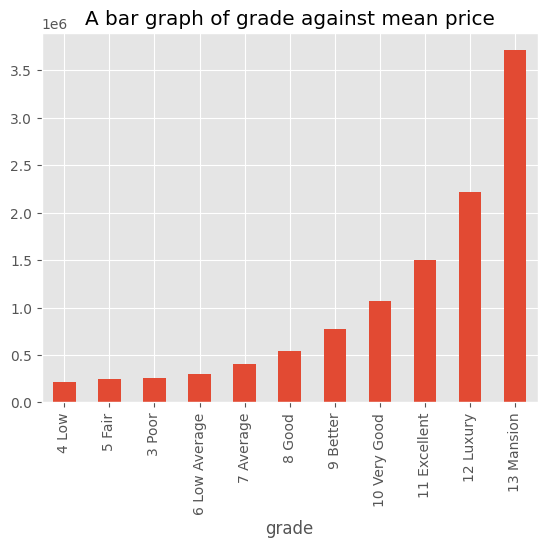

In [74]:
def plot_variable(column):
    grp = df.groupby(column)['price'].mean().sort_values(ascending=True)
    grp.plot(kind='bar', title = 'A bar graph of ' + column + ' against mean price')
    
plot_variable('grade')

> * We can see that average prices for the houses differ depending on grade. In the above plot we can see that houses that had the highest average prices are Average, Good, Better in that order. The least being the one with poor grade.

**How does condition of a house affect house price?**

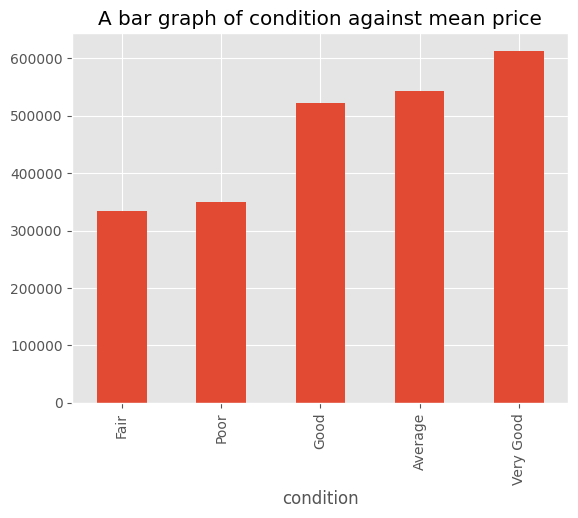

In [75]:
plot_variable('condition')

* From the analysis, it is clear that the condition of the house affects the price. Improving the condition of the house can increase its value and attract potential buyers.

**How view affects house price?**

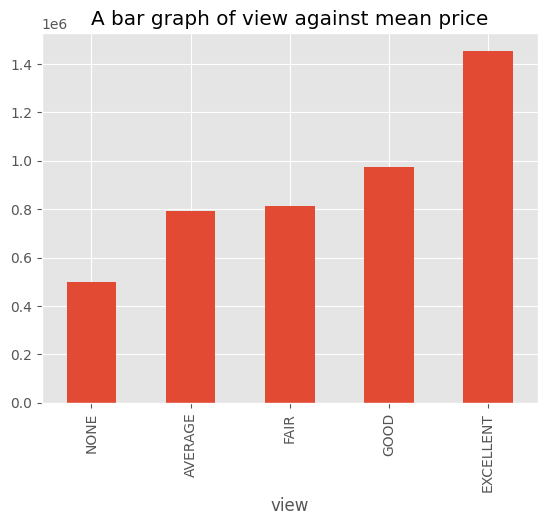

In [76]:
plot_variable('view')

* The analysis shows that houses with excellent views had the highest average sale price. Enhancing the view by landscaping or adding features such as a deck or a balcony can increase the value of the house.

**How does waterfront affect house price?**

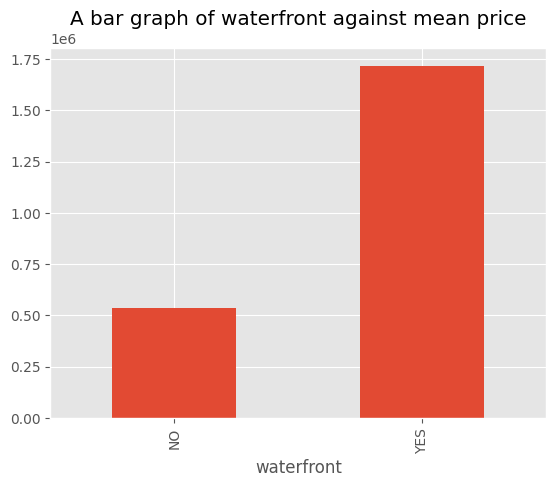

In [77]:
plot_variable('waterfront')

### Distribution analysis and plots

To be able to understand our data well and build reliable models, we need to study the distribution patterns of different variables in our dataset. This will enable us identify the most appropriate tests to use to accurately make informed decsisions.

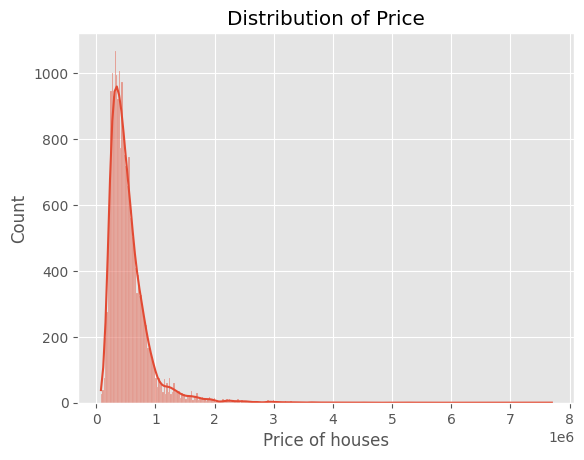

In [78]:
#plot the distribution of the target variable
def histogram_plot(data):    
    sns.histplot(data, kde=True)    
histogram_plot(df.price)
plt.title('Distribution of Price')
plt.xlabel('Price of houses')
plt.ylabel('Count')
plt.show()


**Interpretions**
* The price distribution is positively skewed, which means there are more houses with lower price than higher price. 


### Skewness
 we use the skewness to determine the direction of the outliers

In [79]:
sk = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
sk_res = pd.DataFrame({'Columns':sk.index, 'skewness':sk.values})
for col, value in zip(sk_res['Columns'],sk_res['skewness']):
    if (value <= -1) or (value >= 1):
        print('The column below is highly skewed.')
        print(f'{col} : {value}')
        print()
    if (-0.5 > value > -1) or (0.5 < value < 1):
        print('The column below is moderately skewed.')
        print(f'{col} : {value}')
        print()
    if (0.5 > value > -0.5):
        print('The column below is approximately symmetric.')
        print(f'{col} : {value}')
        print()

The column below is highly skewed.
sqft_lot : 13.056251852883626

The column below is highly skewed.
sqft_lot15 : 9.513044564095368

The column below is highly skewed.
yr_renovated : 5.098099221916137

The column below is highly skewed.
price : 4.035378874466087

The column below is highly skewed.
bedrooms : 2.0399818162187944

The column below is highly skewed.
sqft_basement : 1.6041626954887744

The column below is highly skewed.
sqft_living : 1.4727019951483347

The column below is highly skewed.
sqft_above : 1.4450007970330156

The column below is highly skewed.
sqft_living15 : 1.1045308883004101

The column below is moderately skewed.
long : 0.8817548805770775

The column below is moderately skewed.
date : 0.7460678587456605

The column below is moderately skewed.
floors : 0.6087875250982765

The column below is moderately skewed.
bathrooms : 0.5188980554943093

The column below is approximately symmetric.
zipcode : 0.4077889666043932

The column below is approximately symmetric.


**Interpreting the skewness**
* sqft_lot, sqft_lot15, yr_renovated, price, bedrooms, sqft_living, sqft_above and sqft_living15 variables are highly skewed
* long, floors, bathrooms are moderately skewed
* yr_built and lat are almost symmetrical

In [80]:
transformed = np.log(df['price'])

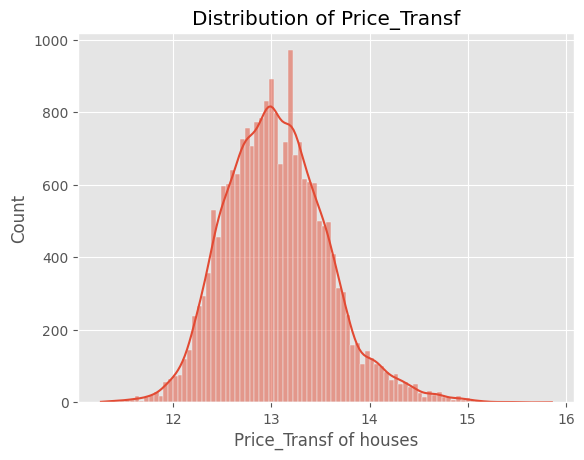

In [81]:
sns.histplot(transformed, kde=True)
plt.title('Distribution of Price_Transf')
plt.xlabel('Price_Transf of houses')
plt.ylabel('Count')
plt.show()

**Convert Categorical variables to numerics**

In order to incorporate the categorical variable in our analysis, we need to deal with them as numerica variables. This will enable us for example, visualize how the categorcal variables affect the price using the correlation matrix.

In [82]:
# Convert categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat_lbl = df_categorical.apply(le.fit_transform)
cat_converted = pd.DataFrame(data_cat_lbl)

#Replace NaN with 0
cat_converted = cat_converted.fillna(0)


#Join the numeric df and the categorical converted variables to main df
df = df_numeric.join(cat_converted, how='left')

**Correlation Matrix Plot**

In order to examine the correlation between the numeric variables and the target variable-price, we found it useful to display the information using a correlation heatmap.

TypeError: corr() got an unexpected keyword argument 'numeric_only'

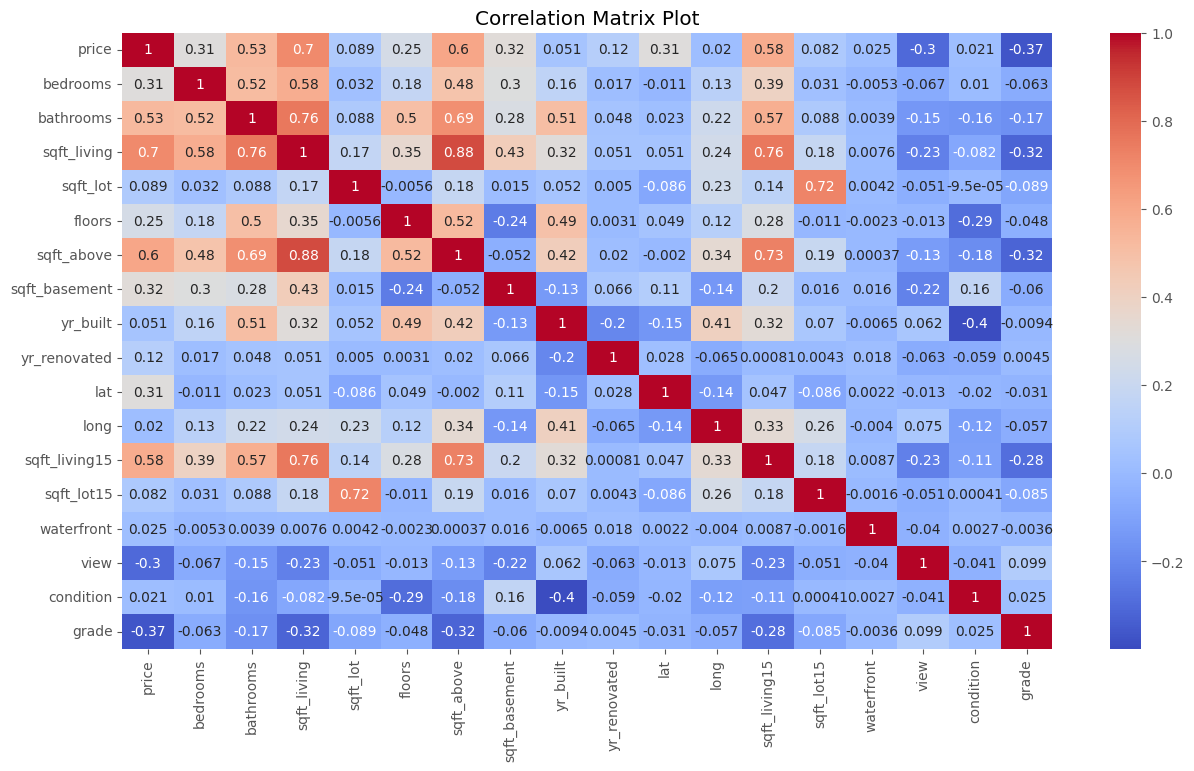

In [83]:
df_corr = df.drop(['date','id','zipcode'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

In [20]:
# dropping the id and zipcode columns
df_corr = df.drop(['id','zipcode'], axis=1)

# defining a function to plot a correlation matrix plot
def corr_plot(data):
    sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
    
corr_plot(df_corr)
    
plt.figure(figsize=(15,8))
plt.title('Correlation Matrix Plot')
plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

**Interpretation**
* From the above correlation matrix plot, We can see that numerical variables that have a higher correlation with price are; ```sqft_living```, ```sqft_above```, ```sqft_living15```,```bathrooms```, and  ```bedrooms```.
* We can also see that the variables with a weak positive correletion to price are ```sqft_lot```, ```sqft_lot15```, and ```yr_built```.

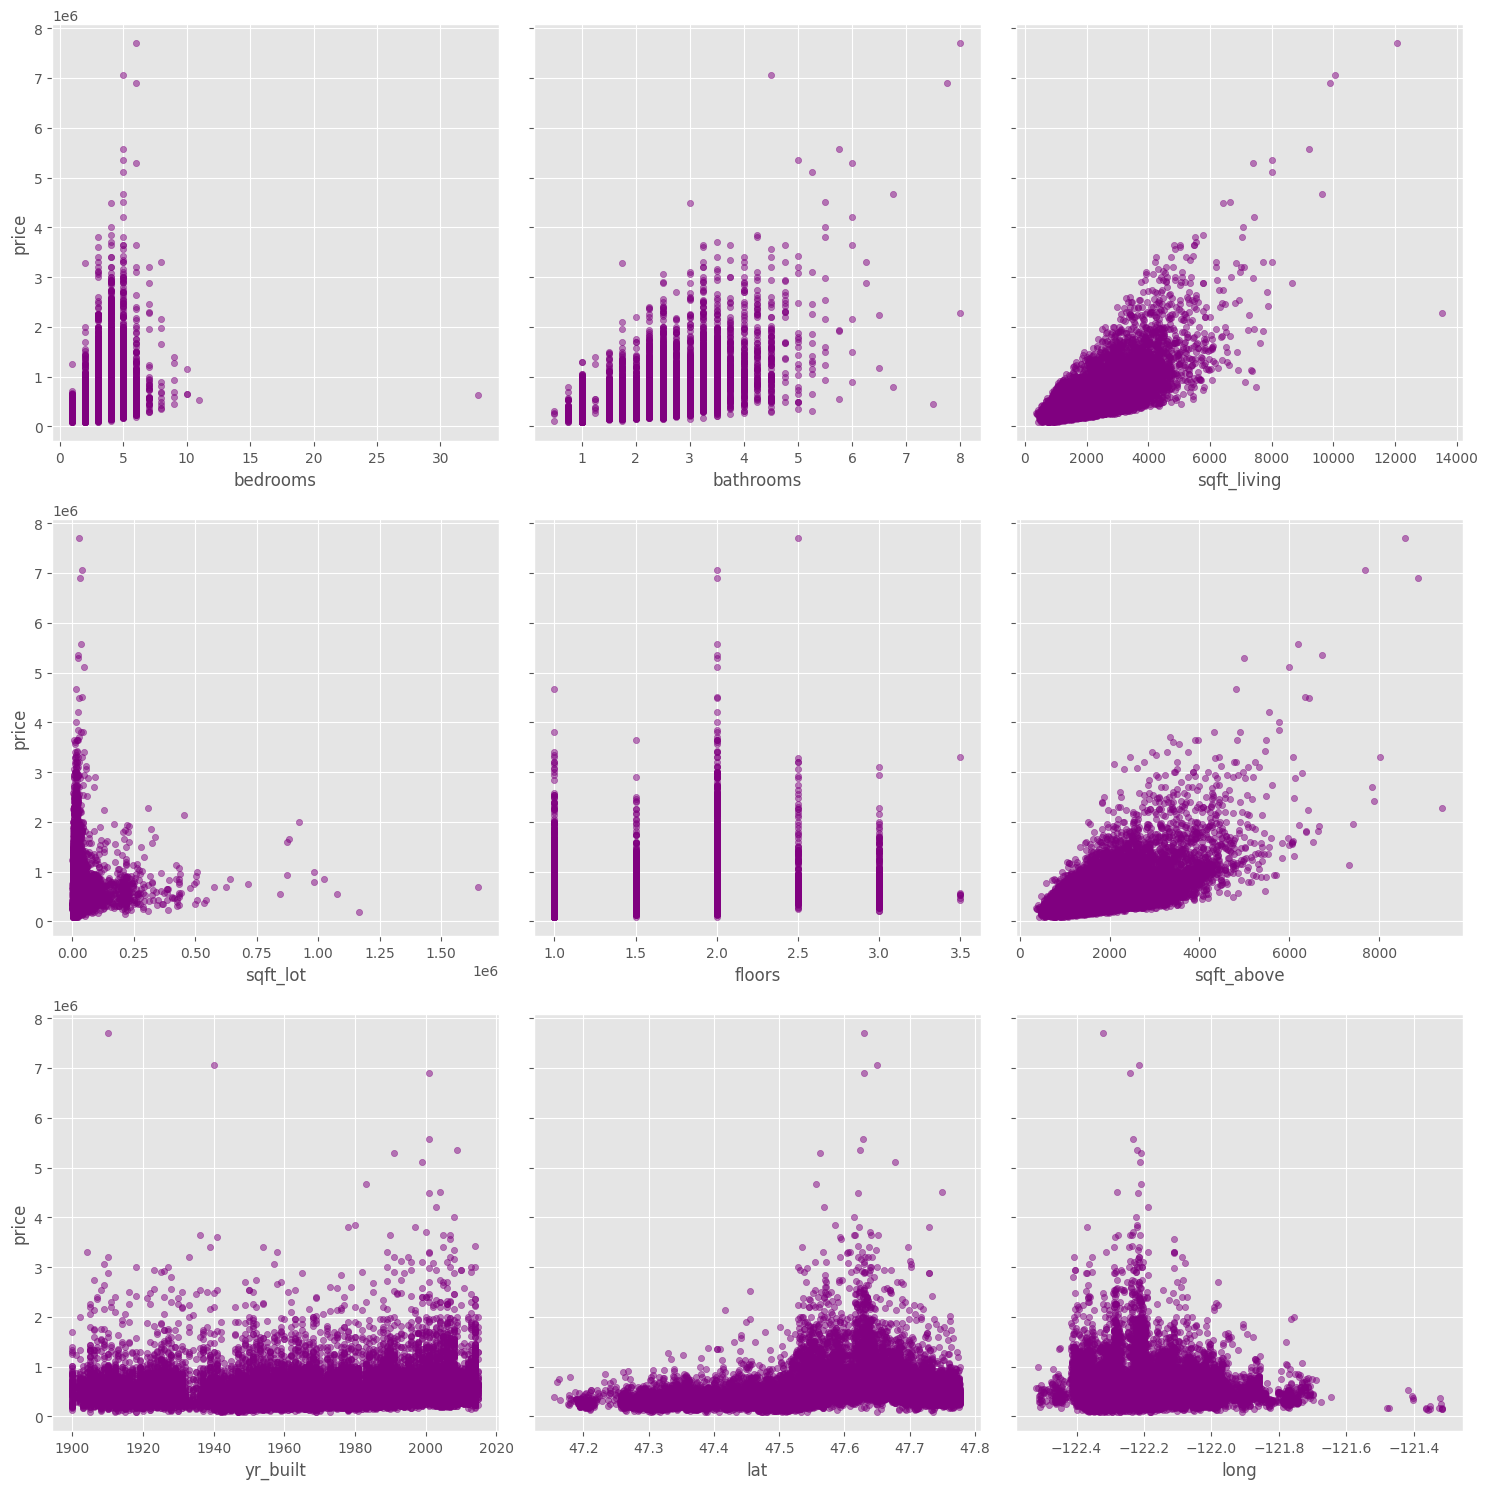

In [84]:
# plotting multiple scatter plots of the various variables

fig = plt.figure(figsize=(18,10))

axes = fig.subplots(nrows=3, ncols=3, sharey=True)

# defining a function to plot multiple scatter plots of the various variables
def multiple_scatterplot(data, columns):
    for xcol, ax in zip(columns, axes.flatten()):
        data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5, color='purple', figsize=(15,15))

multiple_scatterplot(df, columns = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','sqft_above', 'yr_built', 'lat', 'long'])
    
plt.tight_layout()
plt.show()

### Simple Linear Regression
We can perform a regression analysis for the variable that had the highest correlation.


**Using stats models**

In [85]:
#function to perform regression
def model(data, y, x):
    '''This fucntion takes three arguments and prints the regressions summary table'''
    formula = y + '~' + x
    results = smf.ols(formula, data).fit()
    print(results.summary())
    print()
    print(f'R_squared: {results.rsquared}')
    print(f'y_pred = {results.params[0]} + {results.params[1]} * sqft_living')
    print()
model(df, 'price', 'sqft_living')


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.073e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:50:29   Log-Likelihood:            -2.9763e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.255e+04   4436.470     -9.591      

**Interpretation**  
* R-squared indicates the proportion of the variance in the dependent variable ```price``` that is explained by the independent variable ```sqft_living```. The R-squared value of 0.492 means that about 49.2% of the variation in house prices can be explained by their square footage of living space.

* Intercept: This is the estimated value of ```price``` when  ```sqft_living``` is 0. In this case, the intercept is -42,550, which means that a house with 0 square footage of living space would be worth about $42,550, which does not make sense in reality.

* Coefficient of sqft_living: This is the slope of the regression line that represents the change in the ```price``` for a one-unit increase in the ```sqft_living```. In this case, the coefficient is 280.54, which means that on average, the price of a house increases by $280.54 for every one additional square foot of living space.

### Multiple linear regression
When performing regression analysis, we select predictor variables that are likely to have an impact on our target variable. To assess the significance of these variables, we can use a p-value approach, where any variable with a p-value greater than 0.05 is considered unimportant and can be removed from the model. Additionally, there are other methods such as Ridge, Lasso, or Elastic Net regression that penalize variables based on their importance in the model. The goal is to find the most important variables that have a significant impact on the target variable, while eliminating any unimportant variables that do not contribute to the model's accuracy.

In [88]:

X = 'bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + sqft_basement + yr_built + yr_renovated + lat + long + sqft_living15 + sqft_lot15 + waterfront + view + condition + grade'
model(df, 'price', X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2344.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:53:33   Log-Likelihood:            -2.9362e+05
No. Observations:               21420   AIC:                         5.873e+05
Df Residuals:                   21402   BIC:                         5.874e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.316e+07   1.68e+06    -31.637

* From the above summary, R-squared value of 0.651 indicates that about 65.1% of the variation in the  ```price``` variable is explained by the independent variables included in the model.
* Intercept value of -5.316e+07 represents the estimated price when all the independent variables are equal to zero, which is not necessarily meaningful in this context.
* The coefficient of 138.3427 for ```sqft_living``` means that, on average, each additional square foot of living space is associated with an increase in price of $138.34, holding all other variables constant. Also a coefficient of -43791.508783980826 for ```bedrooms ``` means that, on average, each additional bedroom is associated with a decrease in price of $43,791.51, holding all other variables constant.

## Recommendations
Based on the analysis we performed, we can make the following recommendations to our agency:

* Property size matters: Home owners should consider increasing the square footage of the houses before putting it on the market.

* Bathrooms and bedrooms add value: Bathrooms and bedrooms have moderate positive correlations with the price. Therefore, home owners should consider adding an extra bathroom or bedroom to increase the value of their property.

* Condition and grade matter: The condition and grade of a property have a strong negative correlation with the price. Therefore, a home owner consider upgrading the condition or grade of their property to increase the value of the house.

* View can affect the price: The view has a strong negative correlation with the price, which suggests that properties with a better view may be priced lower. However, this may also depend on other factors such as the size and condition of the property.

* Location matters: The latitude and longitude (lat and long) have moderate positive and negative correlations with the price, respectively. a home owner should consider the location of the property as it may affect its value. In some countries, houses that may fall within the tropics may attract more buyers that those on the furthest end of the tropics.

### Project Outline
* Introduction
> * Title
> * Explanation
* Business Problem
* Data Understanding
* Data processing
* Data analysis
> * Statistical tests and distributions
> * Visualizations
* Modeling
> * Linear regression
> * Multiple regression
* Interpretations and Recommendations
* Conclusion

In [49]:
def column_variable (column)
    grp = df.groupby(column)['price'].mean().sort_values(ascending=True)
    grp.plot(kind='bar', title = 'A bar graph of ' + column + 'against price')
    
column_variable ('view')

SyntaxError: invalid syntax (<ipython-input-49-4fc5adbdfd7e>, line 1)

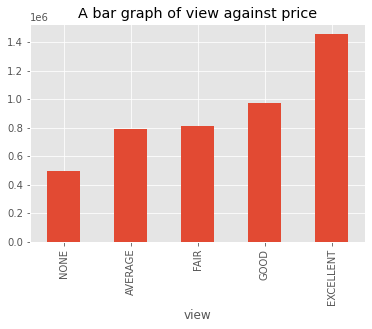

In [52]:
def column_variable (column):
    grp = df.groupby(column)['price'].mean().sort_values(ascending=True)
    grp.plot(kind='bar', title = 'A bar graph of ' + column + ' against price')
    
column_variable ('view')

In [ ]:
grp = df.groupby('view')['price'].mean().sort_values(ascending=True)
grp.plot(kind='bar', ti)

In [56]:
def model(data, y, x):
    '''This fucntion takes three arguments and prints the regressions summary table'''
    formula = y + '~' + x
    results = smf.ols(formula, data).fit()
    return print(results.summary())
model(df, 'price', 'sqft_living')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.073e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:58:36   Log-Likelihood:            -2.9763e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.255e+04   4436.470     -9.591      

In [ ]:
from sklearn.linear_model import LinearRegression

def model(data, y, x):
    '''This function takes three arguments and prints the regressions summary table'''
    # extract the target variable and predictor variable from the data
    X = data[[x]]
    y = data[y]
    
    # create a linear regression object and fit the model
    model = LinearRegression().fit(X, y)
    
    # print the regression summary table
    print('Intercept:', model.intercept_)
    print(x + ' coefficient:', model.coef_[0])
    print('R-squared:', model.score(X, y))
    
model(df, 'price', 'sqft_living')

Intercept: -42548.035293815425
sqft_living coefficient: 280.54356893661367
R-squared: 0.491814479424757
